<a href="https://colab.research.google.com/github/alilotfi90/Flower_Classification/blob/main/permutation_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split

!pip install efficientnet_pytorch
from zipfile import ZipFile
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from efficientnet_pytorch import EfficientNet
import torchvision.models as models
import zipfile
from PIL import Image
import os

drive.mount('/content/drive')

with zipfile.ZipFile('/content/drive/MyDrive/flowerimages.zip', 'r') as zip_ref:
    zip_ref.extractall('unzipped_images_flower')


!pip install Pillow
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


unzipped_folder = '/content/unzipped_images_flower/flowers'
output_folder = '/content/resized_images_flower'


os.makedirs(output_folder, exist_ok=True)

subdirectories = [d for d in os.listdir(unzipped_folder) if os.path.isdir(os.path.join(unzipped_folder, d))]

# seen = set()
for flower_category in subdirectories:
    input_folder = os.path.join(unzipped_folder, flower_category)
    output_category_folder = os.path.join(output_folder, flower_category)


    os.makedirs(output_category_folder, exist_ok=True)

    image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

    for image_file in image_files:
        input_image_path = os.path.join(input_folder, image_file)
        output_image_path = os.path.join(output_category_folder, image_file)

        image = Image.open(input_image_path)

        # # Resize the image
        # target_size = (456, 456)
        # image = image.resize(target_size, Image.ANTIALIAS)

        # Convert the image to grayscale
        image = image.convert('L')


        image.save(output_image_path)

Mounted at /content/drive


In [2]:
data = []

for flower_category in subdirectories:
    category_folder = os.path.join(output_folder, flower_category)
    image_files = [f for f in os.listdir(category_folder) if f.endswith('.jpg')]
    label = subdirectories.index(flower_category)  # Assign a label based on the folder name

    # # Limit the number of images to max_images_per_class
    # image_files = image_files[:max_images_per_class]

    for image_file in image_files:
        image_path = os.path.join(category_folder, image_file)
        data.append((image_path, label))

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


# Splitting train_data into train and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

result regarding transform_combo1


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 322MB/s]


Loaded pretrained weights for efficientnet-b0
Epoch 1/5
Training Loss: 0.812, Accuracy: 75.75%
Validation Loss: 0.594, Accuracy: 81.70%
Epoch 2/5
Training Loss: 0.734, Accuracy: 77.75%
Validation Loss: 0.545, Accuracy: 84.08%
Epoch 3/5
Training Loss: 0.473, Accuracy: 85.24%
Validation Loss: 0.468, Accuracy: 84.87%
Epoch 4/5
Training Loss: 0.396, Accuracy: 87.37%
Validation Loss: 0.417, Accuracy: 87.26%
Epoch 5/5
Training Loss: 0.340, Accuracy: 89.45%
Validation Loss: 0.446, Accuracy: 85.91%
Epoch 1/10
Training Loss: 0.261, Accuracy: 91.70%
Validation Loss: 0.388, Accuracy: 89.04%
Epoch 2/10
Training Loss: 0.392, Accuracy: 87.92%
Validation Loss: 0.535, Accuracy: 83.80%
Epoch 3/10
Training Loss: 0.311, Accuracy: 90.23%
Validation Loss: 0.408, Accuracy: 88.49%
Epoch 4/10
Training Loss: 0.271, Accuracy: 91.23%
Validation Loss: 0.471, Accuracy: 86.66%
Epoch 5/10
Training Loss: 0.257, Accuracy: 91.53%
Validation Loss: 0.483, Accuracy: 85.95%
Epoch 6/10
Training Loss: 0.224, Accuracy: 93.05%

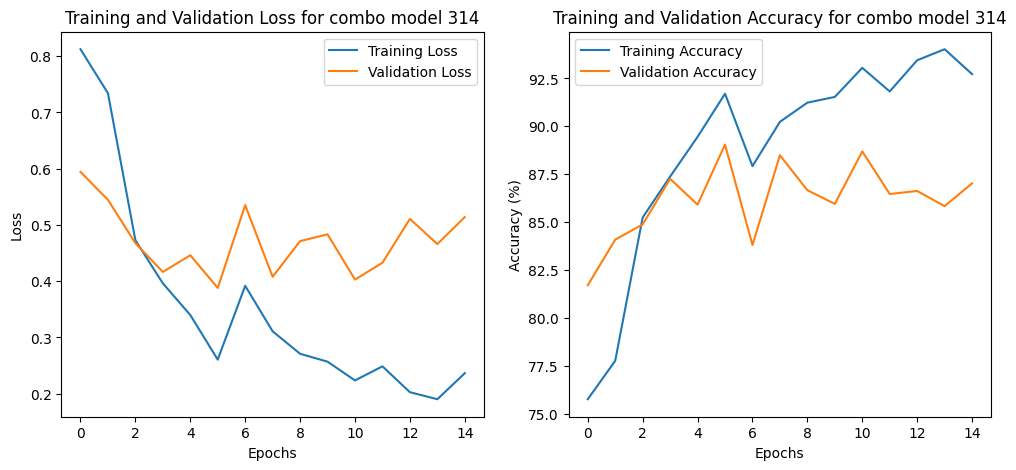

result regarding transform_combo2
Loaded pretrained weights for efficientnet-b0
Epoch 1/5
Training Loss: 0.811, Accuracy: 75.62%
Validation Loss: 0.561, Accuracy: 82.85%
Epoch 2/5
Training Loss: 0.864, Accuracy: 73.38%
Validation Loss: 0.558, Accuracy: 82.10%
Epoch 3/5
Training Loss: 0.489, Accuracy: 84.83%
Validation Loss: 0.524, Accuracy: 83.84%
Epoch 4/5
Training Loss: 0.439, Accuracy: 86.19%
Validation Loss: 0.484, Accuracy: 86.03%
Epoch 5/5
Training Loss: 0.415, Accuracy: 87.05%
Validation Loss: 0.510, Accuracy: 84.24%
Epoch 1/10
Training Loss: 0.278, Accuracy: 91.14%
Validation Loss: 0.396, Accuracy: 89.92%
Epoch 2/10
Training Loss: 0.360, Accuracy: 88.48%
Validation Loss: 0.359, Accuracy: 89.16%
Epoch 3/10
Training Loss: 0.331, Accuracy: 89.73%
Validation Loss: 0.489, Accuracy: 86.26%
Epoch 4/10
Training Loss: 0.283, Accuracy: 91.13%
Validation Loss: 0.404, Accuracy: 88.21%
Epoch 5/10
Training Loss: 0.257, Accuracy: 91.92%
Validation Loss: 0.434, Accuracy: 87.22%
Epoch 6/10
Trai

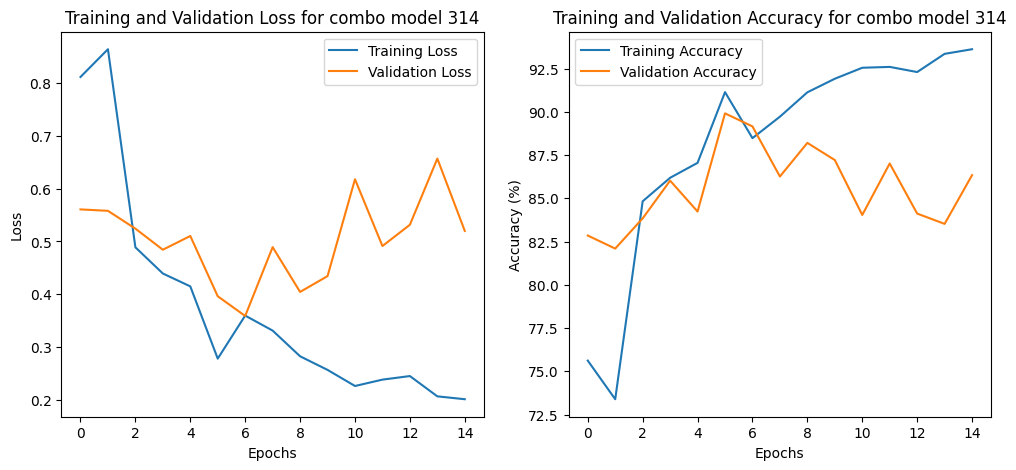

result regarding transform_combo3
Loaded pretrained weights for efficientnet-b0
Epoch 1/5
Training Loss: 0.824, Accuracy: 75.31%
Validation Loss: 0.623, Accuracy: 81.30%
Epoch 2/5
Training Loss: 0.746, Accuracy: 77.50%
Validation Loss: 0.675, Accuracy: 78.48%
Epoch 3/5
Training Loss: 0.479, Accuracy: 85.02%
Validation Loss: 0.536, Accuracy: 83.88%
Epoch 4/5
Training Loss: 0.419, Accuracy: 87.05%
Validation Loss: 0.422, Accuracy: 87.81%
Epoch 5/5
Training Loss: 0.356, Accuracy: 88.80%
Validation Loss: 0.435, Accuracy: 87.10%
Epoch 1/10
Training Loss: 0.275, Accuracy: 91.37%
Validation Loss: 0.464, Accuracy: 87.42%
Epoch 2/10
Training Loss: 0.357, Accuracy: 88.76%
Validation Loss: 0.473, Accuracy: 86.07%
Epoch 3/10
Training Loss: 0.305, Accuracy: 90.24%
Validation Loss: 0.510, Accuracy: 86.42%
Epoch 4/10
Training Loss: 0.284, Accuracy: 91.30%
Validation Loss: 0.457, Accuracy: 87.50%
Epoch 5/10
Training Loss: 0.252, Accuracy: 91.99%
Validation Loss: 0.414, Accuracy: 88.88%
Epoch 6/10
Trai

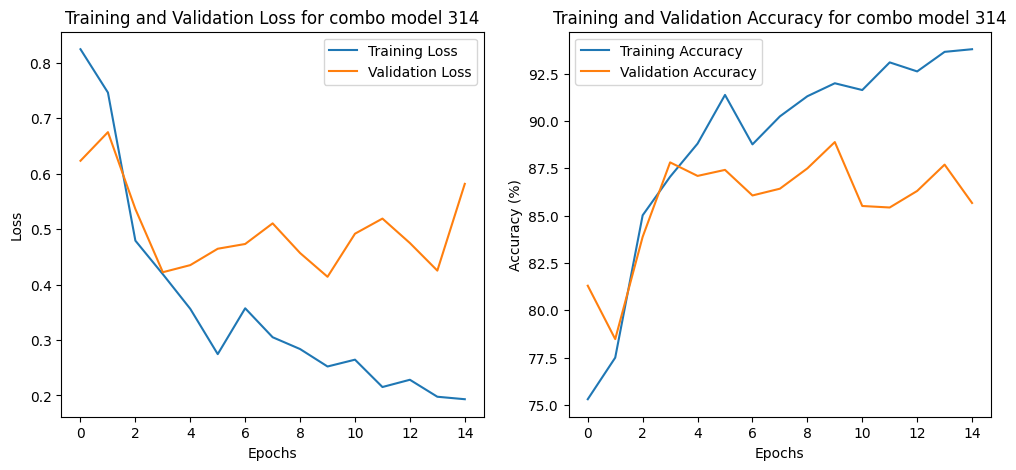

result regarding transform_combo4
Loaded pretrained weights for efficientnet-b0
Epoch 1/5
Training Loss: 0.834, Accuracy: 74.91%
Validation Loss: 0.666, Accuracy: 80.47%
Epoch 2/5
Training Loss: 0.724, Accuracy: 77.86%
Validation Loss: 0.830, Accuracy: 73.80%
Epoch 3/5
Training Loss: 0.503, Accuracy: 84.29%
Validation Loss: 0.450, Accuracy: 85.71%
Epoch 4/5
Training Loss: 0.390, Accuracy: 88.03%
Validation Loss: 0.453, Accuracy: 86.07%
Epoch 5/5
Training Loss: 0.357, Accuracy: 88.80%
Validation Loss: 0.511, Accuracy: 84.04%
Epoch 1/10
Training Loss: 0.282, Accuracy: 91.09%
Validation Loss: 0.359, Accuracy: 89.60%
Epoch 2/10
Training Loss: 0.473, Accuracy: 85.62%
Validation Loss: 0.650, Accuracy: 79.99%
Epoch 3/10
Training Loss: 0.376, Accuracy: 88.30%
Validation Loss: 0.456, Accuracy: 86.38%
Epoch 4/10
Training Loss: 0.286, Accuracy: 90.97%
Validation Loss: 0.389, Accuracy: 87.93%
Epoch 5/10
Training Loss: 0.249, Accuracy: 92.27%
Validation Loss: 0.395, Accuracy: 88.29%
Epoch 6/10
Trai

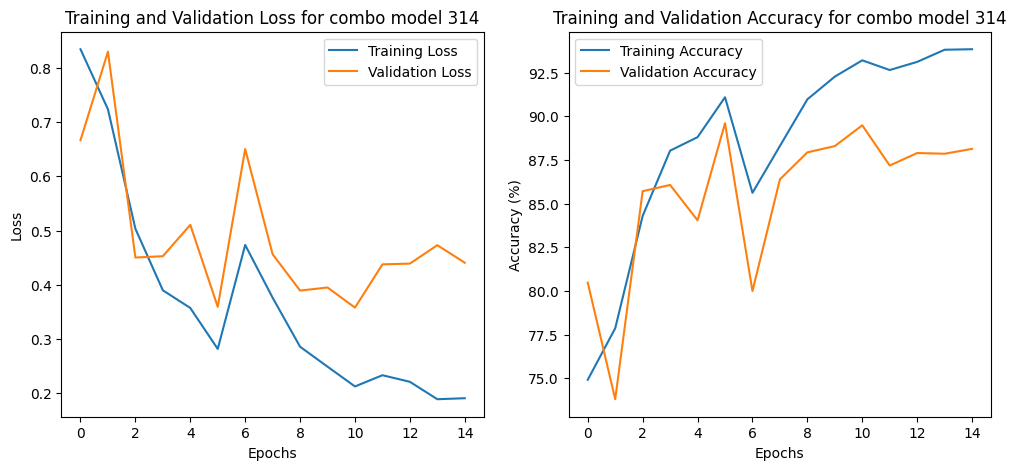

result regarding transform_combo5
Loaded pretrained weights for efficientnet-b0
Epoch 1/5
Training Loss: 0.820, Accuracy: 75.55%
Validation Loss: 0.555, Accuracy: 84.00%
Epoch 2/5
Training Loss: 6.110, Accuracy: 8.57%
Validation Loss: 2.772, Accuracy: 6.63%
Epoch 3/5
Training Loss: 2.771, Accuracy: 6.64%
Validation Loss: 2.771, Accuracy: 7.19%
Epoch 4/5
Training Loss: 12.241, Accuracy: 6.77%
Validation Loss: 2.928, Accuracy: 5.80%
Epoch 5/5
Training Loss: 15.966, Accuracy: 6.76%
Validation Loss: 2.771, Accuracy: 5.80%
Epoch 1/10
Training Loss: 0.951, Accuracy: 70.08%
Validation Loss: 0.729, Accuracy: 76.58%
Epoch 2/10
Training Loss: 0.587, Accuracy: 81.50%
Validation Loss: 0.497, Accuracy: 83.37%
Epoch 3/10
Training Loss: 0.437, Accuracy: 86.00%
Validation Loss: 0.516, Accuracy: 85.11%
Epoch 4/10
Training Loss: 0.339, Accuracy: 89.05%
Validation Loss: 0.482, Accuracy: 85.31%
Epoch 5/10
Training Loss: 0.274, Accuracy: 90.94%
Validation Loss: 0.509, Accuracy: 84.56%
Epoch 6/10
Training L

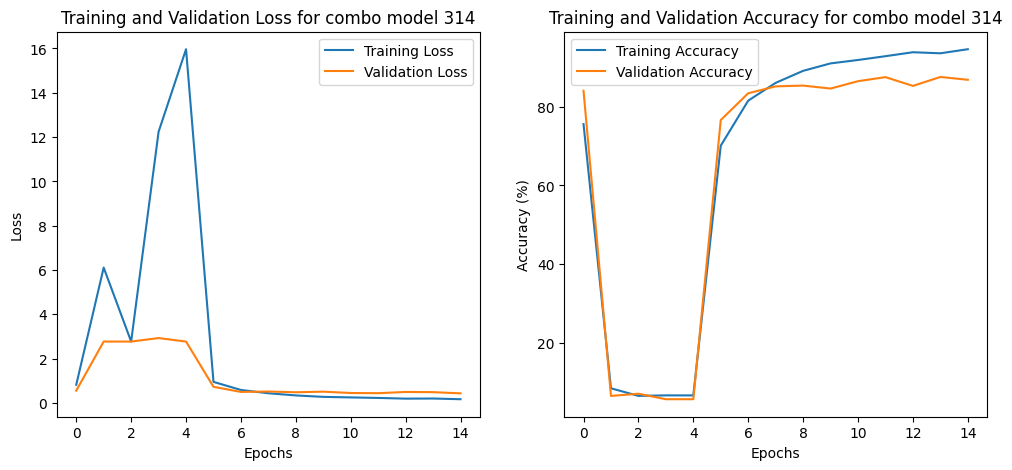

result regarding transform_combo6
Loaded pretrained weights for efficientnet-b0
Epoch 1/5
Training Loss: 0.813, Accuracy: 75.04%
Validation Loss: 0.699, Accuracy: 79.32%
Epoch 2/5
Training Loss: 0.835, Accuracy: 74.70%
Validation Loss: 0.443, Accuracy: 86.42%
Epoch 3/5
Training Loss: 0.492, Accuracy: 84.72%
Validation Loss: 0.438, Accuracy: 85.79%
Epoch 4/5
Training Loss: 0.394, Accuracy: 87.66%
Validation Loss: 0.414, Accuracy: 87.38%
Epoch 5/5
Training Loss: 0.387, Accuracy: 88.17%
Validation Loss: 0.500, Accuracy: 85.83%
Epoch 1/10
Training Loss: 0.273, Accuracy: 91.18%
Validation Loss: 0.372, Accuracy: 89.68%
Epoch 2/10
Training Loss: 0.385, Accuracy: 88.33%
Validation Loss: 0.496, Accuracy: 86.03%
Epoch 3/10
Training Loss: 0.305, Accuracy: 90.01%
Validation Loss: 0.414, Accuracy: 88.01%
Epoch 4/10
Training Loss: 0.273, Accuracy: 91.31%
Validation Loss: 0.361, Accuracy: 89.04%
Epoch 5/10
Training Loss: 0.245, Accuracy: 91.94%
Validation Loss: 0.613, Accuracy: 84.68%
Epoch 6/10
Trai

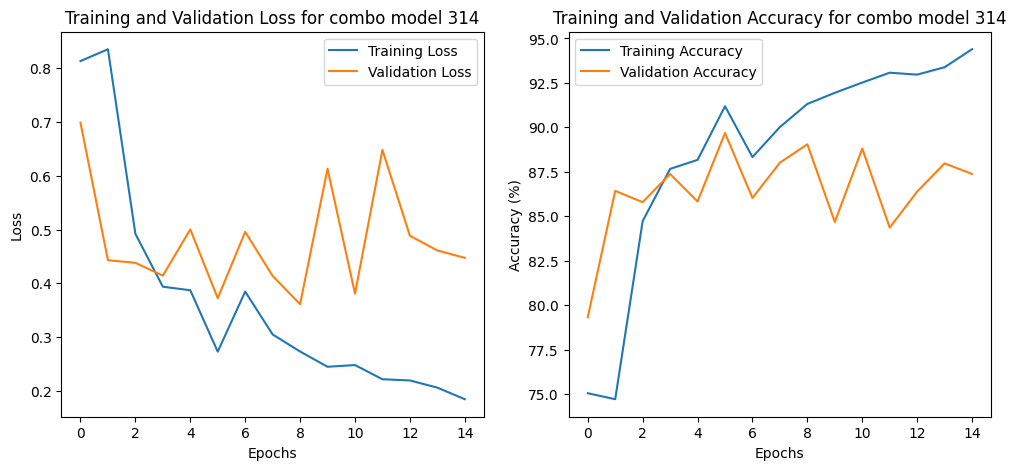

In [3]:
from sklearn.metrics import accuracy_score

import cv2
from torchvision import transforms
from PIL import Image
import numpy as np

import cv2

from sklearn.metrics import accuracy_score

class DilationTransform(object):
    def __init__(self, kernel_size=3):
        self.kernel = np.ones((kernel_size, kernel_size), np.uint8)

    def __call__(self, img):
        img_array = np.array(img)
        dilation = cv2.dilate(img_array, self.kernel, iterations=1)
        return Image.fromarray(dilation)

transform_combo_1 = transforms.Compose([
    transforms.Resize((224, 224)),

    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),

    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),

    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
###
transform_combo_2 = transforms.Compose([
    transforms.Resize((224, 224)),

    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),

    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
###
transform_combo_3 = transforms.Compose([
    transforms.Resize((224, 224)),

    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),


    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),

    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
###
transform_combo_4 = transforms.Compose([
    transforms.Resize((224, 224)),

    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomHorizontalFlip(),


    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),

    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
###
transform_combo_5 = transforms.Compose([
    transforms.Resize((224, 224)),

    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),

    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),

    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
###
transform_combo_6 = transforms.Compose([
    transforms.Resize((224, 224)),

    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),

    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


transform_val_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Convert to 3-channel grayscale
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = Image.open(image_path)
        if self.transform:
            image = self.transform(image)
        return image, label



for i , transform in enumerate([transform_combo_1,transform_combo_2,transform_combo_3,transform_combo_4,transform_combo_5,transform_combo_6]):

  print(f"result regarding transform_combo{i+1}")
  # Creating datasets for training, validation, and testing
  train_dataset = CustomDataset(train_data, transform=transform)
  val_dataset = CustomDataset(val_data, transform=transform_val_test)
  test_dataset = CustomDataset(test_data, transform=transform_val_test)

  # Creating data loaders for training, validation, and testing
  train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
  val_loader = DataLoader(val_dataset, batch_size=32)
  test_loader = DataLoader(test_dataset, batch_size=32)



  # model, criterion, optimizer
  model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=16)
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  # optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  train_losses = []
  train_accuracies = []
  val_losses = []
  val_accuracies = []

  max_epoch = [5, 10]
  for e in max_epoch:
      model.train()
      for epoch in range(e):
          print(f"Epoch {epoch + 1}/{e}")
          running_loss = 0.0
          correct_train = 0
          total_train = 0

          # Training
          for i, data in enumerate(train_loader, 0):
              inputs, labels = data[0].to(device), data[1].to(device)
              optimizer.zero_grad()
              outputs = model(inputs)
              loss = criterion(outputs, labels)
              loss.backward()
              optimizer.step()

              running_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              total_train += labels.size(0)
              correct_train += (predicted == labels).sum().item()

          avg_train_loss = running_loss / len(train_loader)
          train_accuracy = 100 * correct_train / total_train
          train_losses.append(avg_train_loss)
          train_accuracies.append(train_accuracy)
          print(f'Training Loss: {avg_train_loss:.3f}, Accuracy: {train_accuracy:.2f}%')

          # Validation
          model.eval()
          val_loss = 0.0
          correct_val = 0
          total_val = 0
          with torch.no_grad():
              for data in val_loader:
                  images, labels = data[0].to(device), data[1].to(device)
                  outputs = model(images)
                  loss = criterion(outputs, labels)
                  val_loss += loss.item()
                  _, predicted = torch.max(outputs.data, 1)
                  total_val += labels.size(0)
                  correct_val += (predicted == labels).sum().item()

          avg_val_loss = val_loss / len(val_loader)
          val_accuracy = 100 * correct_val / total_val
          val_losses.append(avg_val_loss)
          val_accuracies.append(val_accuracy)
          print(f'Validation Loss: {avg_val_loss:.3f}, Accuracy: {val_accuracy:.2f}%')


  model.eval()
  test_loss = 0.0
  correct_test = 0
  total_test = 0
  with torch.no_grad():
      for data in test_loader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = model(images)
          loss = criterion(outputs, labels)
          test_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total_test += labels.size(0)
          correct_test += (predicted == labels).sum().item()

  avg_test_loss = test_loss / len(test_loader)
  test_accuracy = 100 * correct_test / total_test
  print(f'Test Loss: {avg_test_loss:.3f}, Accuracy: {test_accuracy:.2f}%')
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(train_losses, label='Training Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.title(f'Training and Validation Loss for combo model {i}')

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(train_accuracies, label='Training Accuracy')
  plt.plot(val_accuracies, label='Validation Accuracy')
  plt.title(f'Training and Validation Accuracy for combo model {i}')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy (%)')
  plt.legend()

  save_path = '/content/drive/MyDrive/combo'+str(i)+'.jpg'

  plt.savefig(save_path)

  plt.show()